In [ ]:
from Nic_Data.Nic_CreatedData.nic_variables import drug_list

In [35]:
import pandas as pd
import numpy as np
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from bs4 import BeautifulSoup as bs
from splinter import Browser


# EMCDDA DATA
## Limpieza de datos y creacion de variables

### Datos de consumo de droga por pais

In [4]:
# Data de consumo por droga en varios paises europeos por año

# Importar data del CSV
adults_cannabis_1year = pd.read_csv('../Nic_Data/adults_cannabis_1year.csv', sep=';', skiprows=3, skipfooter=7).drop(columns=['Unnamed: 6'])
# Renombrar columnas para no liarme al unir los dataframes
adults_cannabis_1year.rename(columns={'Total':'Cannabis proportion' }, inplace=True)
# Convertir numeros en numeros (de objetos)
adults_cannabis_1year['Cannabis proportion'] = [float(str(i).replace(",", ".")) for i in adults_cannabis_1year['Cannabis proportion']]
adults_cannabis_1year['Cannabis proportion'].astype(float)
adults_cannabis_1year_prop = adults_cannabis_1year[['Country','Cannabis proportion']]

adults_alcohol_1year = pd.read_csv('../Nic_Data/adults_alcohol_1year.csv', sep=';', skiprows=3, skipfooter=7).drop(columns=['Unnamed: 6'])
adults_alcohol_1year.rename(columns={'Total':'Alcohol prop'}, inplace=True)
adults_alcohol_1year['Alcohol prop'] = [float(str(i).replace(",", ".")) for i in adults_alcohol_1year['Alcohol prop']]
adults_alcohol_1year['Alcohol prop'].astype(float)
adults_alcohol_1year_prop = adults_alcohol_1year[['Country','Alcohol prop']]

adults_amphetamines_1year = pd.read_csv('../Nic_Data/adults_amphetamines_1year.csv', sep=';', skiprows=3, skipfooter=7).drop(columns=['Unnamed: 6'])
adults_amphetamines_1year.rename(columns={'Total':'Amphetamines prop' }, inplace=True)
adults_amphetamines_1year['Amphetamines prop'] = [float(str(i).replace(",", ".")) for i in adults_amphetamines_1year['Amphetamines prop']]
adults_amphetamines_1year['Amphetamines prop'].astype(float)
adults_amphetamines_1year_prop = adults_amphetamines_1year[['Country','Amphetamines prop']] #,'1Y Amphetamines Sample Size',

adults_cocaine_1year = pd.read_csv('../Nic_Data/adults_cocaine_1year.csv', sep=';', skiprows=3, skipfooter=8).drop(columns=['Unnamed: 6'])
adults_cocaine_1year.rename(columns={'Total':'Cocaine prop' }, inplace=True)
adults_cocaine_1year['Cocaine prop'] = [float(str(i).replace(",", ".")) for i in adults_cocaine_1year['Cocaine prop']]
adults_cocaine_1year['Cocaine prop'].astype(float)
adults_cocaine_1year_prop = adults_cocaine_1year[['Country','Cocaine prop']] #,'1Y Cocaine Sample Size'

adults_ecstasy_1year = pd.read_csv('../Nic_Data/adults_ecstasy_1year.csv', sep=';', skiprows=3, skipfooter=7).drop(columns=['Unnamed: 6'])
adults_ecstasy_1year.rename(columns={'Total':'Ecstasy prop' }, inplace=True)
adults_ecstasy_1year['Ecstasy prop'] = [float(str(i).replace(",", ".")) for i in adults_ecstasy_1year['Ecstasy prop']]
adults_ecstasy_1year['Ecstasy prop'].astype(float)
adults_ecstasy_1year_prop = adults_ecstasy_1year[['Country','Ecstasy prop']] #,'1Y Ecstasy Sample Size'

adults_lsd_1year = pd.read_csv('../Nic_Data/adults_lsd_1year.csv', sep=';', skiprows=3,  skipfooter=7).drop(columns=['Unnamed: 6'])
adults_lsd_1year.rename(columns={'Total':'LSD prop' }, inplace=True)
adults_lsd_1year['LSD prop'] = [float(str(i).replace(",", ".")) for i in adults_lsd_1year['LSD prop']]
adults_lsd_1year['LSD prop'].astype(float)
adults_lsd_1year_prop = adults_lsd_1year[['Country','LSD prop']] #,'1Y lsd Sample Size'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [2]:
# funcion para juntar todos los datasets de consumo de drogas (por droga por pais) en un mismo dataset 
# funcion que no funciona del todo

def prevalencia_consumo_EMCDDA():
    
    drug_year_dictionary = {}
    for element in drug_list: 
        drug_year_dictionary['adults_{}_1year'.format(element)] = pd.read_csv(f'./EMCDDA_data/adults_{element}_1year.csv', sep=';', skiprows=3, skipfooter=6).drop(columns=['Unnamed: 6', 'Females', 'Males'])
        drug_year_dictionary['adults_{}_1year'.format(element)].rename(columns={'Sample size':'1Y {} Sample Size', 'Males':'1Y {} Males' , 'Females':'1Y {} Females' , 'Total':'1Y {} Total' }, inplace=True)
        return drug_year_dictionary

In [5]:
# Juntar data para crear un solo dataset con toda la info de consumo/droga/pais
year_data_drug = pd.merge(adults_cannabis_1year_prop, adults_ecstasy_1year_prop, how='outer')
year_data_drug= year_data_drug.merge(adults_lsd_1year_prop, how='outer')
year_data_drug = year_data_drug.merge(adults_cocaine_1year_prop, how='outer')
year_data_drug = year_data_drug.merge(adults_amphetamines_1year_prop, how='outer')
year_data_drug.set_index('Country',inplace=True )
year_data_drug.index.name = None

In [6]:
# quitar NaNs con MICE

cols = year_data_drug.columns

from fancyimpute import IterativeImputer as MICE
year_data_by_drug=MICE( min_value= 0).fit_transform(year_data_drug.values)

year_data_by_drug = pd.DataFrame(year_data_by_drug)
year_data_by_drug.set_index(year_data_drug.index, inplace=True)
year_data_by_drug.columns= cols

# Añadir columna con suma total de consumo de drogas
year_data_by_drug['Sum'] = year_data_by_drug['Cannabis proportion']+year_data_by_drug['Ecstasy prop']+year_data_by_drug['LSD prop']+year_data_by_drug['Cocaine prop']+year_data_by_drug['Amphetamines prop']

In [ ]:
# Guardar en csv aparte 
year_data_by_drug.to_csv('../Nic_Data/Nic_CreatedData/my_year_data_by_drug.csv')

In [7]:
# resultado:
year_data_by_drug

,Cannabis proportion,Ecstasy prop,LSD prop,Cocaine prop,Amphetamines prop,Sum
Austria,6.4,0.400000,0.300000,0.400000,0.400000,7.900000
Belgium,7.0,1.200000,0.000000,1.400000,0.500000,10.100000
Bulgaria,4.2,1.300000,0.200000,0.300000,0.700000,6.700000
Croatia,10.2,1.200000,0.300000,1.800000,1.800000,15.300000
Cyprus,4.0,0.300000,0.100000,0.500000,0.100000,5.000000
Czechia,9.4,1.500000,0.400000,0.500000,0.500000,12.300000
Denmark,6.4,0.500000,0.200000,1.600000,0.700000,9.400000
Estonia,6.6,1.000000,0.700000,1.000000,0.900000,10.200000
Finland,8.2,1.400000,0.800000,0.900000,1.700000,13.000000
France,11.0,0.600000,0.300000,1.600000,0.300000,13.800000


### Ranking y ¿como se compara el consumo con la media?

In [11]:
year_data_by_drug = pd.read_csv('../Nic_Data/Nic_CreatedData/my_year_data_by_drug.csv', index_col = 'Unnamed: 0')

In [39]:
year_data_by_drug['Cannabis proportion'].sort_values()

# Repetido varias veces, 1 por droga y una para la suma (en NIC REPETICIONES CODIGO)

Malta              0.9
Turkey             1.1
Hungary            1.3
Lithuania          2.7
Greece             2.8
Romania            3.5
Poland             3.8
Slovakia           3.8
Sweden             3.9
Cyprus             4.0
Bulgaria           4.2
Latvia             4.2
Norway             5.1
Portugal           5.1
Luxembourg         5.4
Slovenia           5.9
Denmark            6.4
Austria            6.4
Estonia            6.6
Belgium            7.0
United Kingdom     7.1
Germany            7.1
Ireland            7.7
Finland            8.2
Netherlands        9.3
Czechia            9.4
Croatia           10.2
Italy             10.2
Spain             10.5
France            11.0
Name: Cannabis proportion, dtype: float64

In [13]:
below_mean = year_data_by_drug['Sum'] < year_data_by_drug['Sum'].mean()
for country in ['Croatia', 'Estonia', 'Germany', 'Italy', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain','Czechia']:
       if below_mean[country] == True:
         print(country)

Malta
Poland
Portugal
Slovenia


In [14]:
# cacharreo correlacion por interes
year_data_by_drug.corr()

,Cannabis proportion,Ecstasy prop,LSD prop,Cocaine prop,Amphetamines prop,Sum
Cannabis proportion,1.000000,0.494289,0.412288,0.726331,0.479906,0.949080
Ecstasy prop,0.494289,1.000000,0.330679,0.584097,0.709291,0.709895
LSD prop,0.412288,0.330679,1.000000,0.257619,0.572017,0.488769
Cocaine prop,0.726331,0.584097,0.257619,1.000000,0.496513,0.827529
Amphetamines prop,0.479906,0.709291,0.572017,0.496513,1.000000,0.677758
Sum,0.949080,0.709895,0.488769,0.827529,0.677758,1.000000


### Muertes por droga

In [19]:
drug_deaths_years = pd.read_csv('../Nic_Data/drugrelateddeaths.csv', sep=';', skiprows=3,skipfooter=20, index_col='Country' )
drug_deaths_years.index.name = None
drug_deaths_years.pop('Unnamed: 36')
drug_deaths_years = drug_deaths_years.iloc[:,::1]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [20]:
cols = drug_deaths_years.columns

from fancyimpute import IterativeImputer as MICE
drug_deaths_years_complete=MICE( min_value= 0).fit_transform(drug_deaths_years.values)

drug_deaths_years_complete = pd.DataFrame(drug_deaths_years_complete)
drug_deaths_years_complete.set_index(drug_deaths_years.index, inplace=True)
# Renombrar columnas
drug_deaths_years_complete.columns= cols

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [57]:
# Poner paises como indice para facilitar posterior analisis
drug_deaths_years_complete = drug_deaths_years_complete.transpose()

In [58]:
drug_deaths_years_complete = drug_deaths_years_complete.reindex(index=drug_deaths_years_complete.index[::-1])

In [59]:
drug_deaths_years_complete.to_csv('../Nic_Data/Nic_CreatedData/drug_deaths_years_complete.csv')

### Graficos: cambio en tasa de mortalidad/droga/año para ver si tras decrim. se reduce

In [60]:
drug_deaths_years_complete = pd.read_csv('../Nic_Data/Nic_CreatedData/drug_deaths_years_complete.csv', index_col = 'Unnamed: 0')

In [37]:
drug_deaths_years_complete = drug_deaths_years_complete.transpose()

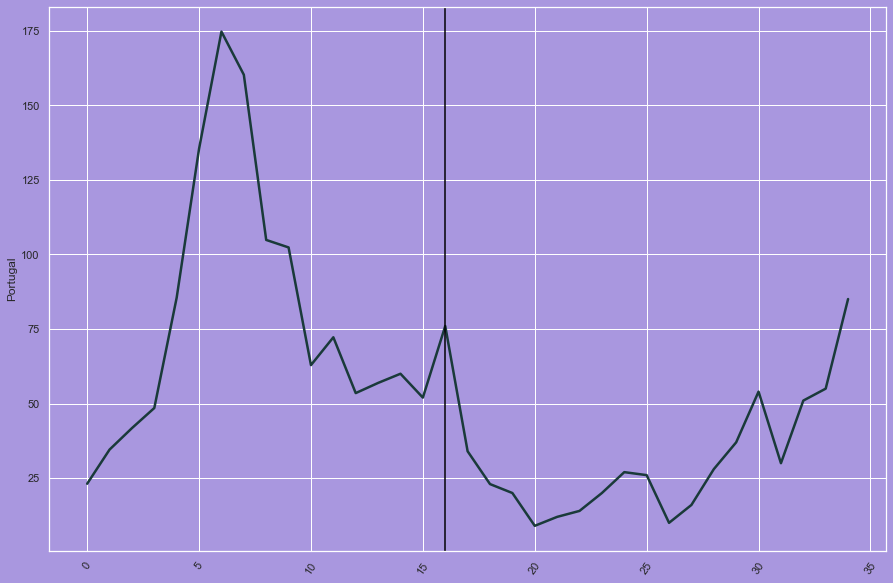

In [38]:
sns.set_theme()
sns.set(rc={'axes.facecolor':'#A997DF', 'figure.facecolor':'#A997DF', 'figure.figsize':(15,10) })

plt.xticks(rotation=55)
g = sns.lineplot(x=drug_deaths_years_complete.index, y=drug_deaths_years_complete['Portugal'],
             data=drug_deaths_years_complete, color='#1A3A3A', linewidth=2.5)

g.axvline(16, color='black')

REPETIR PARA TODOS LOS PAISES CON DROGA DECRIMINALIZADA EN NIC_REPETICIONES CODIGO

### Comparacion media de muertes

In [62]:
drug_deaths_years_complete = pd.read_csv('../Nic_Data/Nic_CreatedData/drug_deaths_years_complete.csv', index_col='Unnamed: 0')

In [64]:
below_mean = drug_deaths_years_complete['2019'] <= drug_deaths_years_complete['2019'].mean()
for country in ['Croatia', 'Estonia', 'Germany', 'Italy', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain',
       'Czechia']:
       if below_mean[country] == False:
           print(country)

Germany
Italy


### Grafico (Catplot) para mostrar distribucion

Text(0.5, 0, 'Numero de muertes')

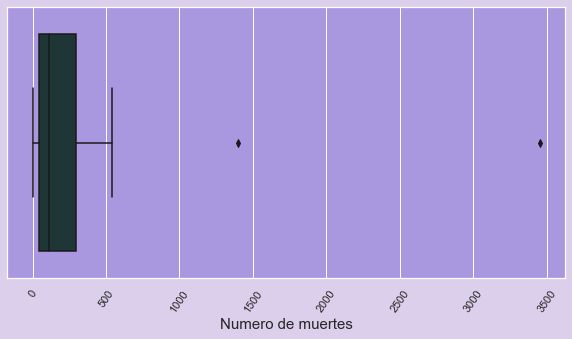

In [65]:
sns.set_theme()
sns.set(rc={'axes.facecolor':'#A997DF', 'figure.facecolor':'#DCCFEC', 'figure.figsize':(10,5) })

plt.xticks(rotation=55)
sns.boxplot(x=drug_deaths_years_complete['2019'], color='#1A3A3A' )


plt.xlabel("Numero de muertes", size=15) 

### Muertes como % de la poblacion

In [66]:
population_2019 = {'Country':['Cyprus','Luxembourg','Bulgaria','Estonia','Slovakia','Czechia','Lithuania','Slovenia','Portugal','Austria','Poland','Denmark','Finland','Netherlands','Ireland','Norway','France',
                    'Belgium','Croatia','Germany','Greece','Hungary','Italy','Malta','Romania','Spain','Sweden','Turkey','United Kingdom','Latvia'],
                    'population':['87590','613900','7000000','1324800','5450400','10649800','2794200','2080900','10276600','8858800','37972800','5806100','5517900','17282200','4904200','5378858','67028000',
                    '11467900','4076200','83019200','10722300','9772800','60359500','493600','19401700','46934600','10230200','82003900','66647100','1920000']}

population_2019 = pd.DataFrame(population_2019)

population_2019.set_index('Country', inplace=True)
population_2019.index.name = None

In [ ]:
drug_deaths_years_complete = pd.read_csv('../Nic_Data/Nic_CreatedData/drug_deaths_years_complete.csv', index_col='Unnamed: 0')

In [73]:
drug_deaths_years_complete

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
United Kingdom,873.754710,710.422148,880.002974,966.626699,872.863629,886.930794,762.553888,1155.023257,1083.187332,1797.186080,...,2058.0,2197.0,2178.0,2529.000000,2717.000000,3140.000000,3357.000000,3284.000000,3116.253293,3453.318853
Turkey,216.124178,172.821349,155.153058,230.659523,163.785603,171.286838,130.609179,138.760163,157.045073,31.522959,...,126.0,105.0,162.0,232.000000,497.000000,590.000000,920.000000,941.000000,657.000000,342.000000
Sweden,133.927386,101.370455,70.000000,55.000000,56.000000,62.000000,62.000000,66.000000,83.000000,86.000000,...,369.0,371.0,427.0,476.000000,628.000000,672.000000,600.000000,636.000000,566.000000,540.000000
Spain,140.000000,151.000000,226.000000,327.000000,426.000000,444.000000,553.000000,536.000000,421.000000,367.000000,...,393.0,361.0,383.0,403.000000,455.000000,390.000000,483.000000,437.000000,450.000000,245.275129
Slovenia,14.850652,23.517622,13.297657,6.124522,34.408606,65.776681,89.239529,98.623781,65.796422,79.429490,...,25.0,24.0,26.0,28.000000,28.000000,32.000000,40.000000,47.000000,59.000000,74.000000
Slovakia,16.969483,31.721079,32.475975,48.172509,96.492172,151.697549,210.497112,179.678551,129.838603,90.952955,...,20.0,16.0,26.0,27.000000,13.000000,27.000000,20.000000,19.000000,32.000000,34.000000
Romania,25.384295,36.232149,39.912856,49.764708,88.530630,134.766406,167.432498,171.907134,115.549071,146.457186,...,34.0,15.0,28.0,30.000000,33.000000,21.000000,19.000000,32.000000,26.000000,45.000000
Portugal,23.111023,34.556540,41.759586,48.507894,85.531368,135.451343,174.729167,160.272896,104.871979,102.360129,...,26.0,10.0,16.0,28.000000,37.000000,54.000000,30.000000,51.000000,55.000000,85.053635
Poland,44.531723,49.812884,46.020290,50.079508,110.539797,155.000000,213.000000,199.000000,211.000000,185.000000,...,261.0,285.0,227.0,247.000000,279.000000,255.000000,204.000000,202.000000,199.000000,196.914963
Norway,45.000000,44.000000,43.000000,48.000000,45.000000,70.000000,88.000000,104.000000,93.000000,124.000000,...,248.0,262.0,246.0,234.000000,266.000000,289.000000,282.000000,247.000000,286.000000,312.526430


In [78]:
drug_death_prop = pd.merge(drug_deaths_years_complete, population_2019, left_index=True, right_index=True)
drug_death_prop['population'] = drug_death_prop['population'].astype(int)

In [80]:
drug_death_prop['% pop deaths'] = (drug_death_prop['2019']/drug_death_prop['population'])*100 

In [82]:
drug_death_prop['% pop deaths'].sort_values()

Malta             0.000000
Bulgaria          0.000157
Romania           0.000232
Czechia           0.000394
Turkey            0.000417
Hungary           0.000440
Poland            0.000519
Spain             0.000523
Italy             0.000618
Slovakia          0.000624
Latvia            0.000625
Greece            0.000671
France            0.000711
Portugal          0.000828
Belgium           0.001158
Luxembourg        0.001303
Netherlands       0.001458
Germany           0.001684
Lithuania         0.001861
Estonia           0.002038
Austria           0.002212
Croatia           0.002380
Slovenia          0.003556
Denmark           0.003688
Finland           0.004241
United Kingdom    0.005181
Sweden            0.005278
Cyprus            0.005708
Norway            0.005810
Ireland           0.006364
Name: % pop deaths, dtype: float64

In [83]:
below_mean = drug_death_prop['% pop deaths'] > drug_death_prop['% pop deaths'].mean()
for country in ['Croatia', 'Estonia', 'Germany', 'Italy', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain','Czechia']:
       if below_mean[country] == True:
         print(country)

Croatia
Estonia
Slovenia


### Tratamientos con comparacion, raking y media

In [87]:
# Importar data
treatment_data = pd.read_csv('../Nic_Data/diff_treatments.csv', sep=';', skiprows=3, skipfooter=12, index_col='Country')
treatment_data.index.name = None
treatment_data.drop(['Unnamed: 9','All opioid substitution treatment clients - Year', 'All treatment demand  clients (TDI) - Year', 'Total number of clients in treatment (ST24) - Year','Estimation of total number of clients in treatment','Estimation specification'], axis=1, inplace =True )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [96]:
treatment_data.columns

Index(['All opioid substitution treatment clients - N. clients',
       'All treatment demand  clients (TDI) - N. clients',
       'Total number of clients in treatment (ST24) - N. clients'],
      dtype='object')

In [97]:
treatment_data['All treatment demand  clients (TDI) - N. clients'].sort_values()

Slovenia             186
Estonia              290
Luxembourg           381
Finland              521
Lithuania            806
Latvia               811
Cyprus               982
Bulgaria            1550
Malta               1943
Slovakia            3295
Portugal            3471
Greece              3950
Romania             4266
Czechia             4386
Hungary             4579
Austria             5056
Norway              6068
Poland              6483
Croatia             6910
Denmark             7277
Ireland            10267
Netherlands        10987
Belgium            12471
Turkey             12495
Italy              38268
Germany            42603
Sweden             43672
Spain              47972
France             53886
United Kingdom    116546
Name: All treatment demand  clients (TDI) - N. clients, dtype: int64

In [100]:
below_mean = treatment_data['All treatment demand  clients (TDI) - N. clients'] > treatment_data['All treatment demand  clients (TDI) - N. clients'].mean()
for country in ['Croatia', 'Estonia', 'Germany', 'Italy', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain','Czechia']:
       if below_mean[country] == True:
         print(country)

Germany
Italy
Spain


In [92]:
# ranking acceso 
treatment_data['Total number of clients in treatment (ST24) - N. clients'].sort_values()

Lithuania            806
Cyprus              1404
Estonia             1646
Malta               1943
Latvia              2639
Luxembourg          2736
Slovakia            3295
Romania             4266
Hungary             4579
Bulgaria            6249
Croatia             6658
Ireland            10267
Poland             11341
Greece             12545
Denmark            16500
Norway             18452
Finland            19600
Portugal           25339
Slovenia           25559
Austria            25730
Belgium            28502
Netherlands        31115
Sweden             39433
Czechia            46228
Italy             142678
Spain             203059
United Kingdom    233776
France            253000
Turkey            282501
Germany           683300
Name: Total number of clients in treatment (ST24) - N. clients, dtype: int64

In [99]:
below_mean = treatment_data['Total number of clients in treatment (ST24) - N. clients'] > treatment_data['Total number of clients in treatment (ST24) - N. clients'].mean()
for country in ['Croatia', 'Estonia', 'Germany', 'Italy', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain','Czechia']:
       if below_mean[country] == True:
         print(country)

Germany
Italy
Spain


In [93]:
# ranking sustitucion de opioides
treatment_data['All opioid substitution treatment clients - N. clients'].sort_values()

Cyprus               277
Hungary              629
Slovakia             661
Latvia               710
Malta                777
Lithuania           1033
Estonia             1054
Luxembourg          1099
Romania             1772
Poland              3021
Bulgaria            3072
Slovenia            3301
Finland             3329
Sweden              4014
Czechia             5000
Croatia             5202
Netherlands         5241
Denmark             6600
Turkey              7164
Norway              7900
Greece              9708
Ireland            10318
Belgium            16030
Portugal           16867
Austria            19587
Spain              58447
Italy              75711
Germany            79700
United Kingdom    148287
France            177100
Name: All opioid substitution treatment clients - N. clients, dtype: int64

In [98]:
below_mean = treatment_data['All opioid substitution treatment clients - N. clients'] > treatment_data['All opioid substitution treatment clients - N. clients'].mean()
for country in ['Croatia', 'Estonia', 'Germany', 'Italy', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain','Czechia']:
       if below_mean[country] == True:
         print(country)

Germany
Italy
Spain


### Crear variable con todo 

In [103]:
year_data_by_drug_death = pd.merge(year_data_by_drug, drug_deaths_years_complete['2019'], left_index=True, right_index=True)
year_data_by_drug_death_treatment = pd.merge(year_data_by_drug_death, treatment_data, left_index=True, right_index=True)
year_data_by_drug_death_treatment_pop = pd.merge(year_data_by_drug_death_treatment, population_2019, left_index = True, right_index=True)
year_data_by_drug_death_treatment_pop['population'] = year_data_by_drug_death_treatment_pop['population'].astype(int)
year_data_by_drug_death_treatment_pop['All treatment demand  clients (TDI) - N. clients'] = year_data_by_drug_death_treatment_pop['All treatment demand  clients (TDI) - N. clients'].astype(int)
year_data_by_drug_death_treatment_pop.rename(columns={'2019':'2019 Deaths','All opioid substitution treatment clients - N. clients':'Opioid substitution clients','All treatment demand clients (TDI) - N. clients':'Treatment demand clients','Total number of clients in treatment (ST24) - N. clients':'ST24 substitution clients' }, inplace=True)

In [104]:
year_data_by_drug_death_treatment_pop.to_csv('../Nic_Data/Nic_CreatedData/full_european_drug_stats.csv')

In [106]:
df = pd.read_csv('../Nic_Data/Nic_CreatedData/full_european_drug_stats.csv', index_col='Unnamed: 0')

In [107]:
df['opioid prop'] = (df['Opioid substitution clients']/df['population']) *100
df['TDI prop'] = (df['All treatment demand  clients (TDI) - N. clients']/df['population']) *100
df['st24 prop'] = (df['ST24 substitution clients']/df['population']) *100

df['opioid diff'] = (df['Sum']-df['opioid prop'])
df['TDI diff'] = (df['Sum']-df['TDI prop']) 
df['st24 diff'] = (df['Sum']/df['st24 prop']) 

In [108]:
df[['Sum','opioid prop','TDI prop','st24 prop', 'opioid diff','TDI diff', 'st24 diff']]

,Sum,opioid prop,TDI prop,st24 prop,opioid diff,TDI diff,st24 diff
Austria,7.900000,0.221102,0.057073,0.290446,7.678898,7.842927,27.199580
Belgium,10.100000,0.139781,0.108747,0.248537,9.960219,9.991253,40.637776
Bulgaria,6.700000,0.043886,0.022143,0.089271,6.656114,6.677857,75.052008
Croatia,15.300000,0.127619,0.169521,0.163338,15.172381,15.130479,93.670562
Cyprus,5.000000,0.316246,1.121133,1.602923,4.683754,3.878867,3.119302
Czechia,12.300000,0.046949,0.041184,0.434074,12.253051,12.258816,28.336190
Denmark,9.400000,0.113674,0.125334,0.284184,9.286326,9.274666,33.077176
Estonia,10.200000,0.079559,0.021890,0.124245,10.120441,10.178110,82.095747
Finland,13.000000,0.060331,0.009442,0.355208,12.939669,12.990558,36.598316
France,13.800000,0.264218,0.080393,0.377454,13.535782,13.719607,36.560727


### Crimen y delitos

In [111]:
delitos = pd.read_csv('../Nic_Data/drug_offences.csv', sep=';', skiprows=3, skipfooter=6, index_col= 'Country')
delitos.index.name= None
delitos.drop('Unnamed: 14', axis = 1, inplace=True)

In [112]:
cols = delitos.columns

from fancyimpute import IterativeImputer as MICE
delitos_data=MICE( min_value= 0).fit_transform(delitos.values)

delitos_data = pd.DataFrame(delitos_data)
delitos_data.set_index(delitos.index, inplace=True)
delitos_data.columns= cols

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [113]:
below_mean = delitos_data['2019'] <= delitos_data['2019'].mean()
for country in ['Croatia', 'Estonia', 'Germany', 'Italy', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain',
       'Czechia']:
       if below_mean[country] == True:
           print(country)

Croatia
Estonia
Malta
Netherlands
Poland
Portugal
Slovenia
Czechia


In [114]:
delitos_data

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
Austria,43329.000000,47880.000000,42610.000000,36235.000000,32907.000000,30250.000000,28227.000000,23797.000000,25892.000000,23853.000000,22729.000000,20043.000000,24166.000000
Belgium,56645.000000,54749.000000,51774.000000,49416.000000,47083.000000,48727.000000,42935.000000,39181.000000,41661.000000,39307.000000,41525.000000,40357.000000,37867.000000
Bulgaria,2856.000000,2382.000000,2433.000000,4886.000000,4195.000000,9340.000000,9521.000000,8322.000000,6167.000000,6577.000000,5149.000000,4185.000000,4301.000000
Croatia,11181.000000,11179.000000,11353.000000,11551.000000,9551.000000,9999.000000,8229.000000,7295.000000,7767.000000,7784.000000,7063.000000,7882.000000,7952.000000
Cyprus,1053.000000,1168.000000,945.000000,895.000000,948.000000,1082.000000,996.000000,1030.000000,936.000000,851.000000,722.000000,779.000000,878.000000
Czechia,15661.939412,13527.341074,9489.861636,5564.000000,5549.000000,7438.000000,6803.000000,5317.000000,5003.000000,4200.000000,3821.000000,3491.000000,3625.203715
Denmark,31598.000000,29139.000000,26717.000000,25040.204269,26243.857943,26290.000000,24058.000000,21498.000000,21211.000000,17825.000000,17403.000000,18692.000000,18506.000000
Estonia,3998.000000,4505.000000,5809.000000,5653.000000,4982.000000,4162.000000,4538.000000,4616.000000,3821.000000,2977.000000,4241.000000,7671.000000,7039.000000
Finland,32343.000000,29176.000000,27680.000000,25075.000000,23399.000000,21781.000000,22636.000000,20153.000000,20469.000000,19783.000000,18555.000000,16539.000000,16314.000000
France,215143.000000,223509.000000,223509.000000,218731.000000,208946.314224,216110.000000,172962.426561,130236.369642,151072.454991,157341.000000,159412.000000,175691.000000,134620.000000


Text(0.5, 0, 'Numero de Delitos')

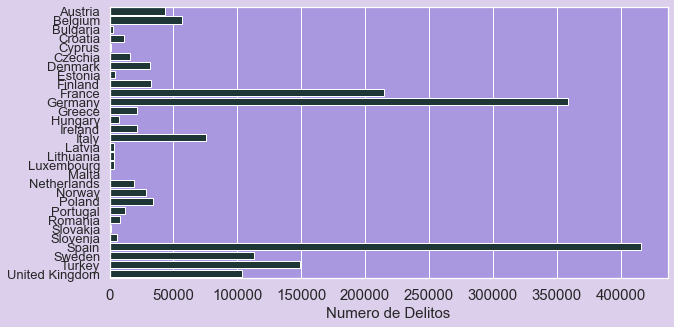

In [115]:
plt.xticks(size=15)
plt.yticks(size=13)
sns.set(rc={'axes.facecolor':'#A997DF', 'figure.facecolor':'#A997DF', 'figure.figsize':(15,10) })
sns.barplot(x=delitos_data['2019'], y=delitos_data.index, data=delitos_data,
            label="Total", color='#1A3A3A')

plt.xlabel("Numero de Delitos", size=15) 

In [116]:
delitos_data['Population']= df['population']
delitos_data_prop = delitos_data[['2019','Population']]
delitos_data_prop['Proportion'] = (delitos_data_prop['2019']/delitos_data_prop['Population'])*100

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Porcentaje')

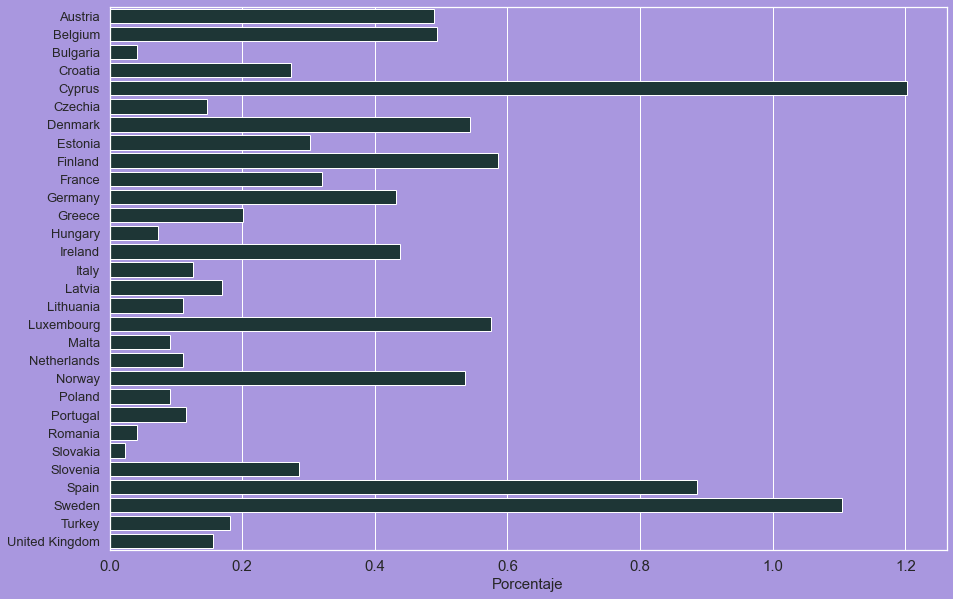

In [117]:
sns.set(rc={'axes.facecolor':'#A997DF', 'figure.facecolor':'#A997DF', 'figure.figsize':(15,10) })
plt.xticks(size=15)
plt.yticks(size=13)
sns.barplot(x=delitos_data_prop['Proportion'], y=delitos_data_prop.index, data=delitos_data_prop,
            label="Total", color='#1A3A3A')
plt.xlabel("Porcentaje", size=15) 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


Text(0.5, 0, 'Numero de Confiscaciones')

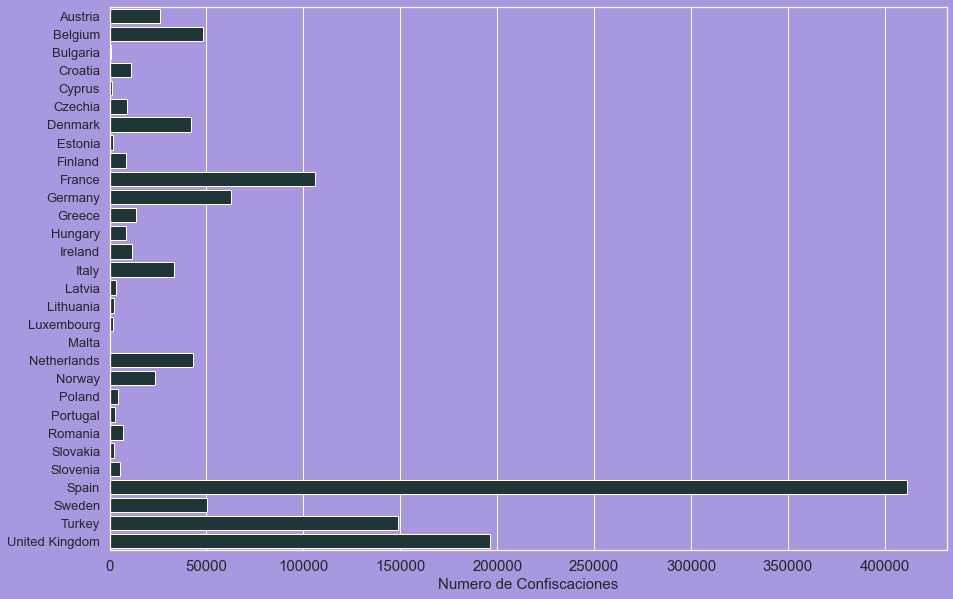

In [120]:
seizures = pd.read_csv('../Nic_Data/seizures.csv', sep=';', skiprows=3, index_col= 'Country', usecols = ['Country','2019','2018','2017','2016','2015','2014'])
seizures.index.name= None
cols = seizures.columns

from fancyimpute import IterativeImputer as MICE
confisc_data=MICE( min_value= 0).fit_transform(seizures.values)

confisc_data = pd.DataFrame(confisc_data)
confisc_data.set_index(seizures.index, inplace=True)
confisc_data.columns= cols

plt.xticks(size=15)
plt.yticks(size=13)
sns.set(rc={'axes.facecolor':'#A997DF', 'figure.facecolor':'#A997DF', 'figure.figsize':(15,10) })
sns.barplot(x=confisc_data['2019'], y=confisc_data.index, data=confisc_data,
            label="Total", color='#1A3A3A')

plt.xlabel("Numero de Confiscaciones", size=15) 

### Consumo Problematico: de opioides

In [121]:
# No merece la pena, muchos años faltan, info muy incompleta... 
# add = pd.read_csv('../Nic_Data/exPDU.csv', sep=';', skiprows=3, skipfooter=59)
# add.drop('Unnamed: 13', axis = 1, inplace=True)

In [123]:
opioides = pd.read_csv('../Nic_Data/opioides.csv', sep=';', skiprows=3, skipfooter=27, index_col = 'Country')
opioides.drop('Unnamed: 10', axis = 1, inplace=True)
opioides.dropna(thresh=5, inplace=True)

In [124]:
opioides['Upper rate/1000 ages 15-64'] = opioides['Upper rate/1000 ages 15-64'].str.replace(',', '.').astype(float)
opioides['Lower rate/1000 ages 15-64'] = opioides['Lower rate/1000 ages 15-64'].str.replace(',', '.').astype(float)
opioides['Central rate/1000 ages 15-64'] = opioides['Central rate/1000 ages 15-64'].str.replace(',', '.').astype(float)

In [125]:
opioides['Central rate/1000 ages 15-64'].loc['Germany *'] = (opioides.loc['Germany *']['Lower rate/1000 ages 15-64']+opioides.loc['Germany *']['Upper rate/1000 ages 15-64'])/2
opioides['Central rate/1000 ages 15-64'].loc['Slovakia *']= (opioides.loc['Slovakia *']['Lower rate/1000 ages 15-64']+opioides.loc['Germany *']['Upper rate/1000 ages 15-64'])/2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [126]:
opioides['Central rate/1000 ages 15-64'].sort_values()

Country
Poland *            0.550
Netherlands *       1.260
Czechia *           1.530
Romania             1.570
Cyprus *            1.720
Slovakia *          1.760
Spain *             2.100
Greece *            2.160
Slovenia *          2.190
Germany *           2.365
Norway *            2.680
Croatia             3.090
Malta *             3.180
Luxembourg *        3.510
Lithuania *         3.920
Portugal            4.500
France *            5.060
Austria *           5.390
Latvia              5.680
Denmark             5.770
Ireland             6.180
Italy *             7.560
Finland             7.650
United Kingdom *    8.420
Name: Central rate/1000 ages 15-64, dtype: float64